# Part II - (PROSPER LOAN DATA EXPLORATION)
## by (SAMUEL OFUOKWU)

## Investigation Overview


>For the presentation, I focused on the feautures and trends amongst the creditgrade category, distribution of borrower rates, Loan original amounts and debt to income ratio. I start by introducing the frequency of creditgrade , the distribution of the borrowerrates,Loan original amount and the debt to income ratio. 
And then i went to to explore how loan amounts and borrower rates are affected by the credit grade, term of loan and home owner status.
And finally how Home owners have higher debt to income ratio than non-home owners.


## Dataset Overview

> This dataset is the Prosper Loan dataset that records 113,937 entries of loans from to accounting for 81 variables, the purpose of this exploration is to explore the relationship between the variables and see the common feautures amongst the Creditgrades categories from worse to bad (HR - AA) and the factors considered when giving out loans to loanees.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df= pd.read_csv('prosperLoanData.csv')

In [3]:
#Create a copy of dataset
df_prosper = df.copy()
#Merge the creditgrade column and the prosperrating column
df_prosper['CreditGrade'] = df['CreditGrade'].astype(str) + ''+ df_prosper ['ProsperRating (Alpha)']
#cleaning the creditgrade column and removing the string 'nan'
df_prosper['CreditGrade'] = df_prosper['CreditGrade'].str.replace('nan','')
default_color = sns.color_palette()[0]

In [4]:
# Create a list called cats 
cats = ["HR",'E','D','C','B','A','AA']
# Import CategoricalDtype function
from pandas.api.types import CategoricalDtype
#assign ordered category to cat_type
cat_type = CategoricalDtype(categories = cats,ordered = True)
#Convert creditgrade column to an ordered category
df_prosper['CreditGrade']= df_prosper['CreditGrade'].astype(cat_type)


## (CreditGrade frequency in the Prosper Loan Dataset)

> The creditgrade category is the credit rating that was assigned at the time the listing went live. After certain factor consideration each loan applicant is given a credit rating from worst to best. From "HR" being the worst rating score to 'AA' being the least creditrating. The AA rating has the fewest people in the category, these are people with the best creditrating.

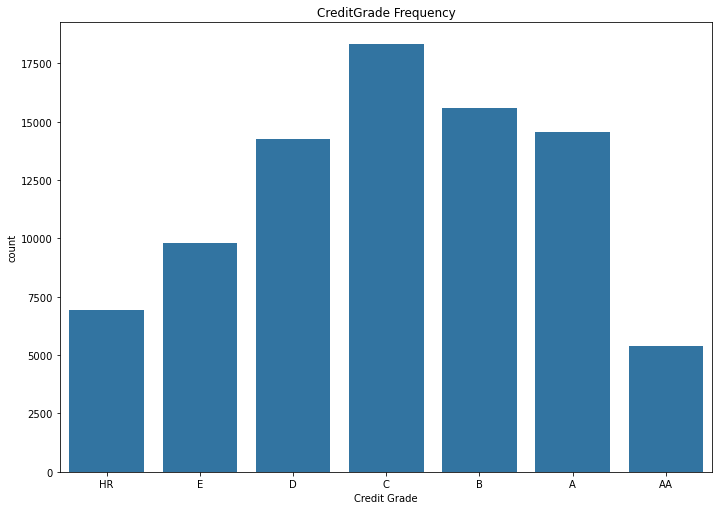

In [5]:
#Plot the creditgradecolumn
plt.figure(figsize = [11.69,8.27])
sns.countplot(data= df_prosper,x = 'CreditGrade',color =default_color).set(title = 'CreditGrade Frequency')
plt.xlabel('Credit Grade');

## (Distribution of Borrower Rate)

> The borrower rate has a large range of values ranging from 0.05 to 0.37 it seems to have two peaks one at 0.15 and another at 0.32 having about 6,500 people with the borrower rate of 15% and about 7,300 people with a borrower rate of 32%. 

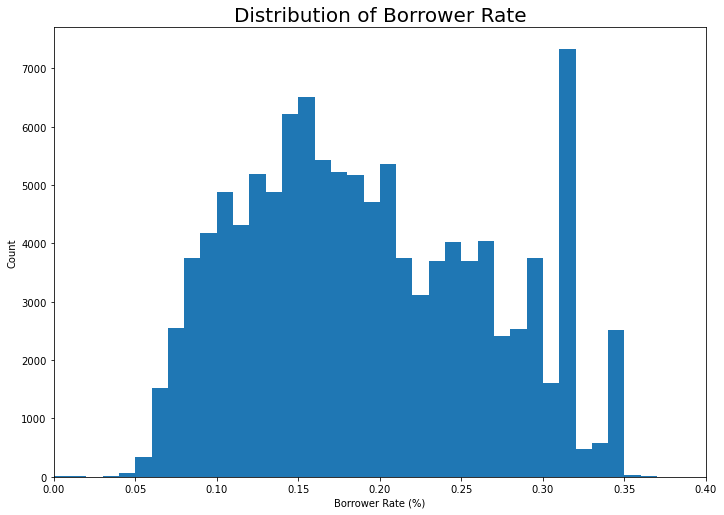

In [6]:
# plotting BorrowerRate on a standard scale
binsize = 0.01
bins = np.arange(0, df['BorrowerRate'].max()+binsize, binsize)
plt.figure(figsize = [11.69,8.27])
plt.hist(data = df, x = 'BorrowerRate', bins = bins)
plt.xlim([0,0.4])
plt.xlabel('Borrower Rate (%)')
plt.ylabel('Count')
plt.title('Distribution of Borrower Rate',fontsize = 20)
plt.show()

## (Distribution of Loan amounts)

> The higher the loan amount the lesser the amount of people that have it available to them.The 5,000 dollars loan has te highest frequency of people with over 16,000 people having the loan. The highest Loan in the dataset is 35,000 dollars and it has very few people.

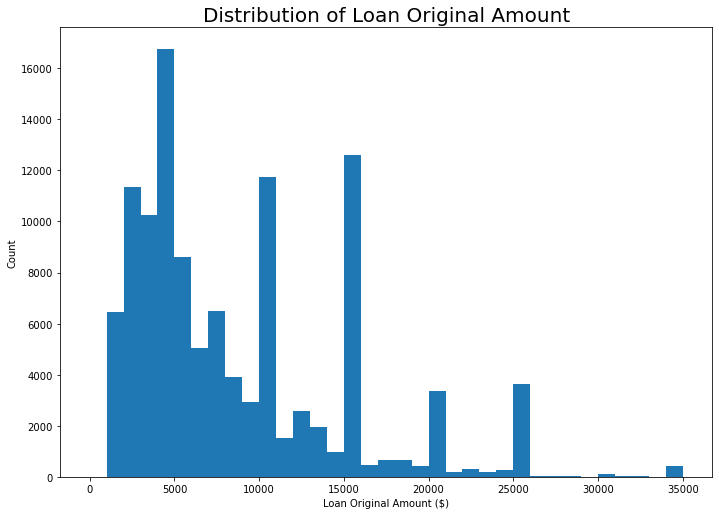

In [7]:
binsize = 1000
bins = np.arange(0, df['LoanOriginalAmount'].max()+binsize, binsize)
plt.figure(figsize = [11.69,8.27])
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins)
plt.title('Distribution of Loan Original Amount',fontsize =20)
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('Count')
plt.show()

## (Loan original amount and Borrower rate by Categorical Variables)

> The visualization shows a boxplot of three categorical variables and their relationship with the loan amount and borrower rates applicable to them. From the visualization above, although unemployed loanees have a higher borrower rate they have less loan amounts available to them while employed loanees have higher loan amounts and also lesser borrower rates.

>Home owners have lesser borrower rates than people without homes and homeowners have higher loan amounts.

>Finally, The higher the creditgrade the higher the loan amount and the lower the borrowerrates

In [8]:
def boxgrid(x, y, **kwargs):
    """ Creating box plots with seaborn's PairGrid. """
    default_color = sns.color_palette()[0]
    sns.boxplot(x=x, y=y, color=default_color)
category_var = ['CreditGrade','Term']

<Figure size 841.68x595.44 with 0 Axes>

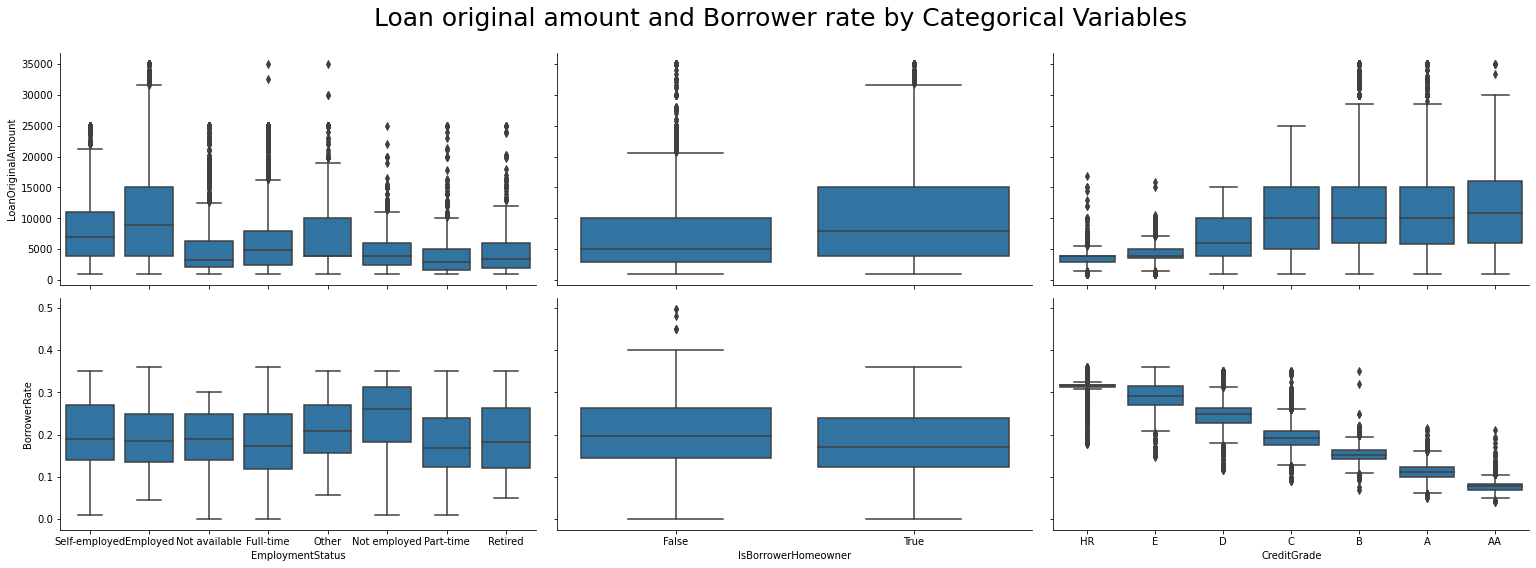

In [9]:
yvars = ['Loan Original Amount ($)','Borrower Rate ($)']
#Creating a boxplot function called boxgrid
ax =plt.figure(figsize = [11.69,8.27]);
#Plotting a pairgrid using the boxplot function
g = sns.PairGrid(data = df_prosper, y_vars = ['LoanOriginalAmount','BorrowerRate'], x_vars = ['EmploymentStatus','IsBorrowerHomeowner','CreditGrade'],
                height = 4, aspect = 1.8);
g.map(boxgrid);
g.fig.subplots_adjust(top=0.9);
g.fig.suptitle('Loan original amount and Borrower rate by Categorical Variables',fontsize =25);
plt.show();

## (Distribution of Debt to Income ratio)
The histogram representation of the distribution of the Debttoincome ratio is a righttail distribution, it peaked around 0.2 meaning majorly most people that have approved loan has a healthy debt to income ratio.

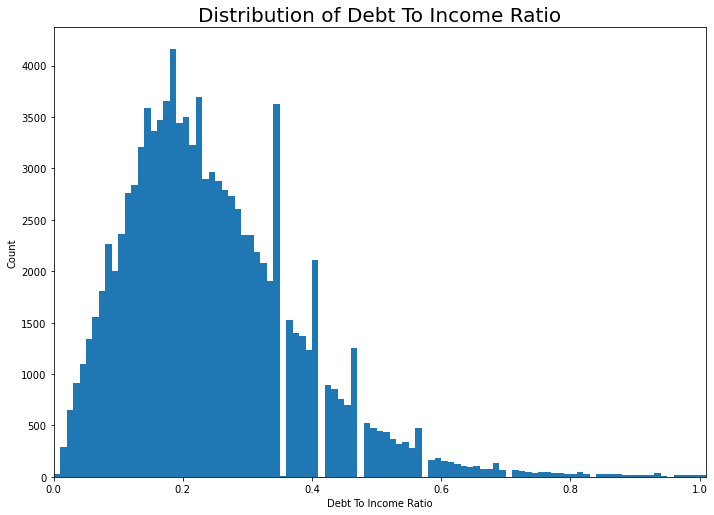

In [10]:
# plotting DebtToIncomeRatio on a standard scale
binsize = 0.01
bins = np.arange(0, df['DebtToIncomeRatio'].max()+binsize, binsize)
plt.figure(figsize=[11.69, 8.27])
plt.hist(data = df, x = 'DebtToIncomeRatio', bins = bins)
plt.xlim([0,1.01])
plt.title('Distribution of Debt To Income Ratio',fontsize =20)
plt.xlabel('Debt To Income Ratio')
plt.ylabel('Count')
plt.show();

## ( CreditGrade and Term of Loan by Loan Original Amount)
According to the visualization above we can see the Term of loan accross all the creditgrade and the loan amount they were able to have access to on an average. Firstly, the Loan Amount tends to increase per creditgrade but that isn't all we can see that the term of Loan is also a factor within respective creditgrades where loans with 36 months have higher loan amounts than those with 12 months or 24 months on an average.

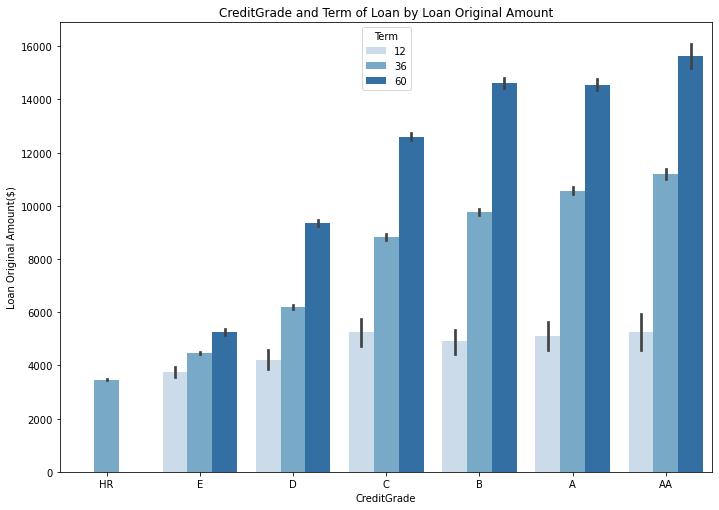

In [11]:
plt.figure(figsize = [11.69,8.27])
sns.barplot(data = df_prosper, x = 'CreditGrade',y='LoanOriginalAmount', hue = 'Term', palette = 'Blues').set(title = 'CreditGrade and Term of Loan by Loan Original Amount')
plt.ylabel('Loan Original Amount($)') ;

## ( CreditGrade and Home status by Debt To Income Ratio)
> The debt to income ratio reduces with increase to creditgrade this shows the very huge reliance of income range when giving out loans to loan applicants. Also par HR credit grade home owners seem to have a higher debt to income ratio tahan non-home owners.


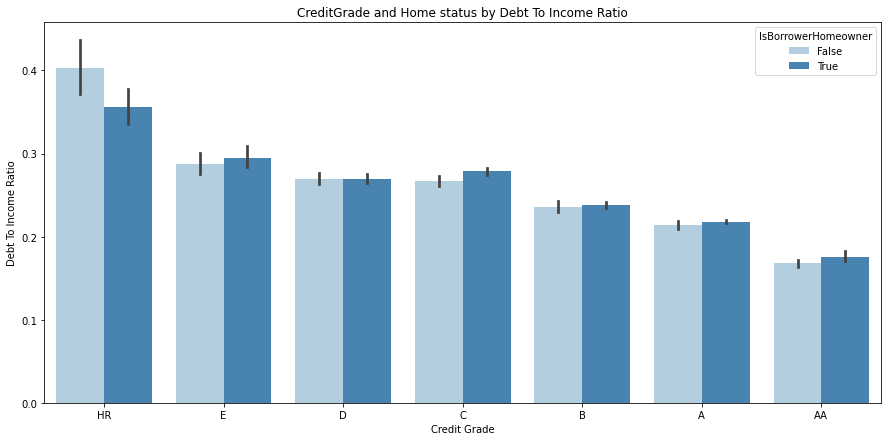

In [12]:
plt.figure(figsize = [15,7])
sns.barplot(data = df_prosper, x = 'CreditGrade',y='DebtToIncomeRatio', hue = 'IsBorrowerHomeowner', palette = 'Blues').set(title = 'CreditGrade and Home status by Debt To Income Ratio')
plt.ylabel('Debt To Income Ratio')
plt.xlabel('Credit Grade');

In [ ]:
!jupyter nbconvert Part_II_ProjectIII_slide_deck_.ipynb --to slides --post serve --no-input --no-prompt